In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)

%matplotlib inline
sns.set_style("whitegrid")
np.random.seed(42)

In [40]:
def winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return 'DRAW'

def lose(row):
    if row['home_score'] > row['away_score']: return row['away_team'] 
    elif row['home_score'] < row['away_score']: return row['home_team']
    else: return 'DRAW'


In [2]:
data = pd.read_csv("results.csv", parse_dates=['date'])
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21838,1999-06-09,Armenia,Ukraine,0,0,UEFA Euro qualification,Yerevan,Armenia,False
15985,1990-06-08,Argentina,Cameroon,0,1,FIFA World Cup,Milan,Italy,True
33125,2011-11-11,Djibouti,Namibia,0,4,FIFA World Cup qualification,Djibouti,Djibouti,False
16426,1991-06-22,Mozambique,Swaziland,2,1,Friendly,Maputo,Mozambique,False
2273,1940-12-01,Italy,Hungary,1,1,Friendly,Genoa,Italy,False


# Top 10 types of Tournaments Played through 1872-2018

Text(0,0.5,'Type of Tournament')

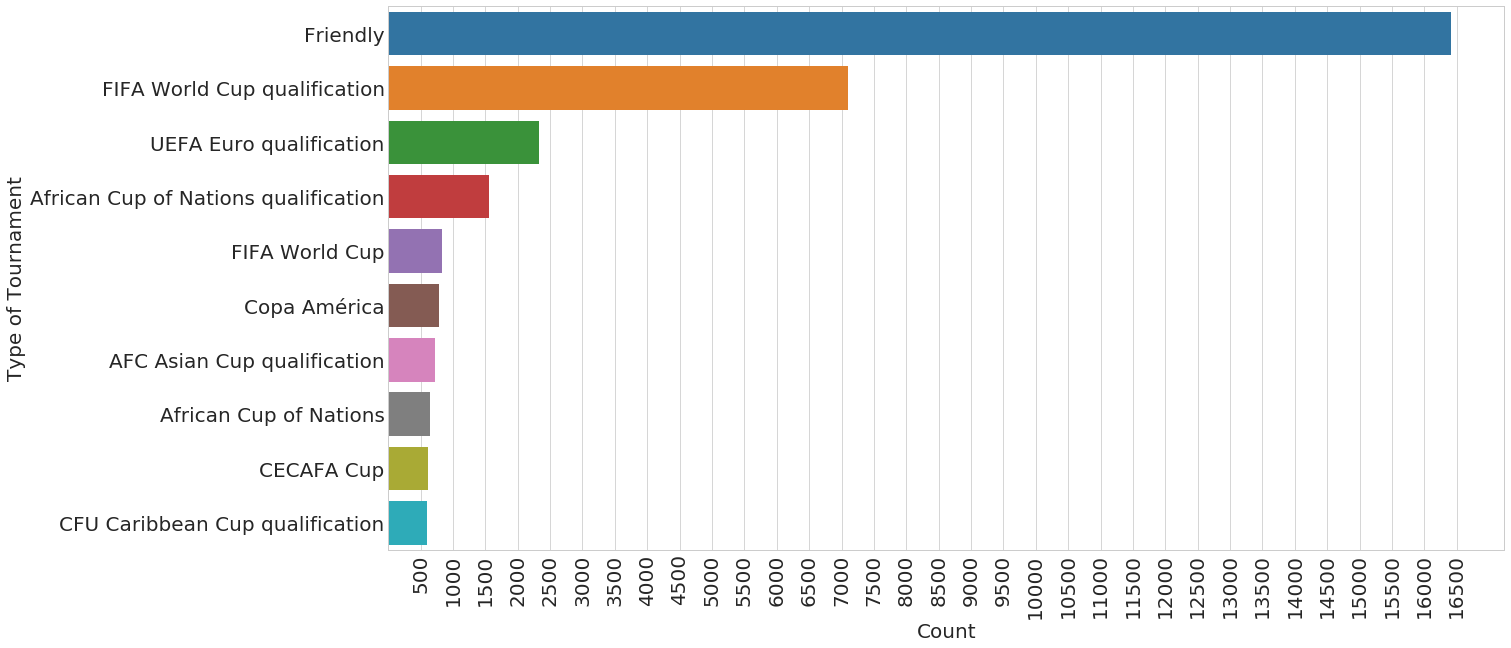

In [3]:
plt.figure(figsize=(20,10))
sns.barplot(data=pd.DataFrame(data.tournament.value_counts()[:10]).reset_index(),x='tournament', y='index', orient='h')
plt.xlabel("Count")
plt.xticks([i for i in range(500, 17000, 500)],rotation=90)
plt.ylabel("Type of Tournament")

# Distributions of Home & Away Score

(For whenever they score)

/home/sw/anaconda3/envs/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sw/anaconda3/envs/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


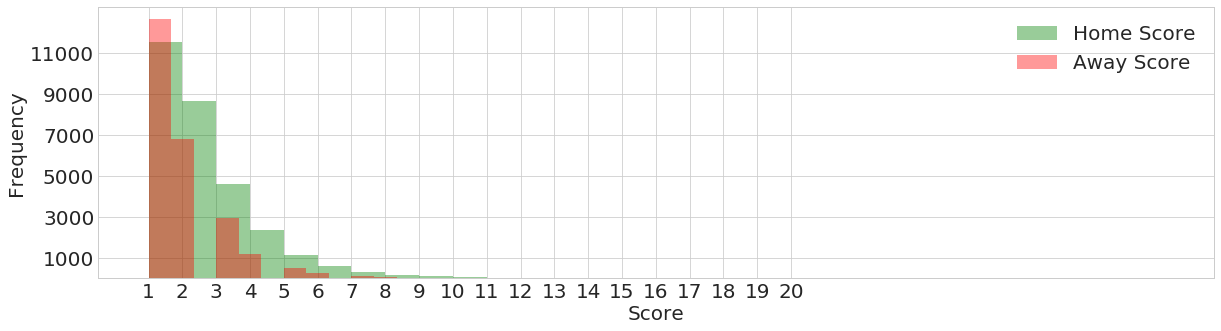

In [4]:
plt.figure(figsize=(20,5))
sns.distplot(data[data['home_score']>0]['home_score'],kde=False,bins=30, color='g', label='Home Score')
sns.distplot(data[data['away_score']>0]['away_score'], kde=False, bins=30, color='r', label='Away Score')
plt.legend()
plt.xticks([i for i in range(1,21)])
plt.yticks([i for i in range(1000,13000,2000)])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [18]:
major_world_tournaments = data[data['tournament'].isin(['Copa América','FIFA World Cup','UEFA Euro'])]
major_world_tournaments.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3079,1950-07-02,Italy,Paraguay,2,0,FIFA World Cup,São Paulo,Brazil,True
6349,1967-02-02,Uruguay,Argentina,1,0,Copa América,Montevideo,Uruguay,False
12207,1982-06-25,England,Kuwait,1,0,FIFA World Cup,Bilbao,Spain,True
37337,2016-06-03,USA,Colombia,0,2,Copa América,Santa Clara,USA,False
1666,1934-06-10,Italy,Czechoslovakia,2,1,FIFA World Cup,Rome,Italy,False


([<matplotlib.patches.Wedge at 0x7f7d85a56b38>,
 [Text(-0.960688,-0.719081,'tie'), Text(0.880631,0.659158,'not a tie')],
 [Text(-0.560402,-0.419464,'76.0%'), Text(0.480344,0.359541,'24.0%')])

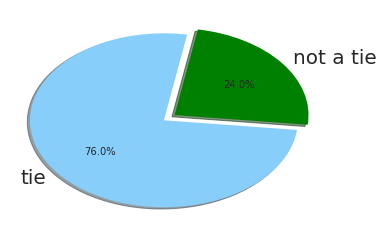

In [39]:
colors=['lightskyblue','green']
plt.pie(major_world_tournaments['neutral'].value_counts(), labels=['tie','not a tie'], colors=colors,
       startangle=80, explode=(0.1,0), autopct='%1.1f%%', shadow=True)

In [49]:
win_lose = data
win_lose['winner'] = data.apply(lambda row: winner(row), axis=1)
win_lose['loser'] = win_lose.apply(lambda row: lose(row), axis=1)
win_lose.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
21944,1999-07-24,Brazil,Germany,4,0,Confederations Cup,Guadalajara,Mexico,True,Brazil,Germany
9523,1976-02-22,Gabon,Chad,0,1,Friendly,Libreville,Gabon,False,Chad,Gabon
28432,2006-11-15,Cyprus,Germany,1,1,UEFA Euro qualification,Nicosia,Cyprus,False,DRAW,DRAW
15278,1989-02-23,Costa Rica,Guatemala,2,3,Friendly,Los Angeles,USA,True,Guatemala,Costa Rica
21834,1999-06-08,Cuba,St. Kitts and Nevis,2,0,CFU Caribbean Cup,Macoya,Trinidad and Tobago,True,Cuba,St. Kitts and Nevis


In [51]:
win_lose[win_lose.date > '2000-01-01'].winner.value_counts()

DRAW                        3997
Mexico                       179
Spain                        171
Brazil                       169
USA                          163
Germany                      157
Japan                        155
Iran                         154
France                       148
Saudi Arabia                 147
Egypt                        146
Korea Republic               141
Argentina                    139
Netherlands                  138
Portugal                     136
Oman                         126
England                      122
Italy                        120
Qatar                        120
Nigeria                      118
South Africa                 117
Costa Rica                   117
Ivory Coast                  116
Uganda                       113
Sweden                       113
Australia                    112
Honduras                     112
Poland                       111
China                        111
Trinidad and Tobago          111
          

In [57]:
win_lose.pivot_table(index=['winner','loser'], aggfunc=[np.average, len], values=['home_score','away_score'])

average                   len           
                               away_score home_score away_score home_score
winner      loser                                                         
Afghanistan Bangladesh           0.000000   4.000000          1          1
            Bhutan               2.800000   1.200000          5          5
            Cambodia             0.666667   1.666667          3          3
            Kyrgyzstan           1.000000   0.666667          3          3
            Laos                 2.000000   0.000000          1          1
            Maldives             1.000000   3.000000          2          2
            Mongolia             1.000000   0.000000          1          1
            Nepal                0.500000   0.500000          2          2
            Pakistan             0.000000   2.000000          2          2
            Singapore            1.000000   2.000000          2          2
            Sri Lanka            1.500000   1.500000          6          6
            Turkmenistan         1.000000   3.000000          1          1
Albania     Algeria              0.000000   3.000000          1          1
            Andorra              0.000000   2.000000          2          2
            Armenia              1.333333   1.333333          3          3
            Azerbaijan           0.333333   1.333333          3          3
            Belarus              0.000000   1.000000          1          1
            Belgium              0.000000   2.000000          1          1
            Bosnia-Herzegovina   0.000000   2.000000          1          1
            Bulgaria             1.000000   2.500000          2          2
            Cyprus               1.000000   4.500000          2          2
            Czechoslovakia       2.000000   3.000000          1          1
            Denmark              0.000000   1.000000          1          1
            Estonia              0.000000   2.000000          1          1
            Finland              0.000000   1.500000          2          2
            France               0.000000   1.000000          1          1
            Georgia              1.333333   2.666667          3          3
            Greece               0.750000   1.250000          4          4
            Iceland              0.500000   1.500000          2          2
            Iran                 0.000000   1.000000          1          1
...                                   ...        ...        ...        ...
Zimbabwe    Israel               1.000000   2.000000          1          1
            Kenya                0.000000   2.000000          1          1
            Lesotho              2.076923   1.769231         13         13
            Liberia              0.000000   3.000000          2          2
            Libya                1.000000   2.000000          1          1
            Madagascar           1.333333   0.333333          3          3
            Malawi               1.041667   1.625000         24         24
            Mali                 1.000000   1.333333          3          3
            Mauritania           0.000000   3.000000          1          1
            Mauritius            1.000000   1.250000          8          8
            Mozambique           2.900000   1.300000         10         10
            Namibia              1.500000   3.250000          4          4
            Nigeria              0.000000   2.000000          1          1
            Qatar                2.000000   0.000000          1          1
            Rwanda               1.500000   1.500000          2          2
            Réunion              1.000000   0.000000          1          1
            Saudi Arabia         2.000000   0.000000          1          1
            Senegal              0.000000   1.500000          2          2
            Seychelles           0.600000   2.800000          5          5
            Somalia              2.000000   1.000000       